In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/global_traffic_accidents.csv")


In [33]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%Y-%m-%d %H:%M")

# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accident ID        10000 non-null  object        
 1   Date               10000 non-null  object        
 2   Time               10000 non-null  object        
 3   Location           10000 non-null  object        
 4   Latitude           10000 non-null  float64       
 5   Longitude          10000 non-null  float64       
 6   Weather Condition  10000 non-null  object        
 7   Road Condition     10000 non-null  object        
 8   Vehicles Involved  10000 non-null  int64         
 9   Casualties         10000 non-null  int64         
 10  Cause              10000 non-null  object        
 11  DateTime           10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 937.6+ KB
None


In [4]:
df.head(3)

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,DateTime
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,2023-04-19 06:39:00
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,2023-01-17 02:47:00
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,2024-04-09 02:55:00


            Location  Casualties
0     Beijing, China        5233
7  São Paulo, Brazil        5124
8       Tokyo, Japan        5017
5      Paris, France        5004
9    Toronto, Canada        5003


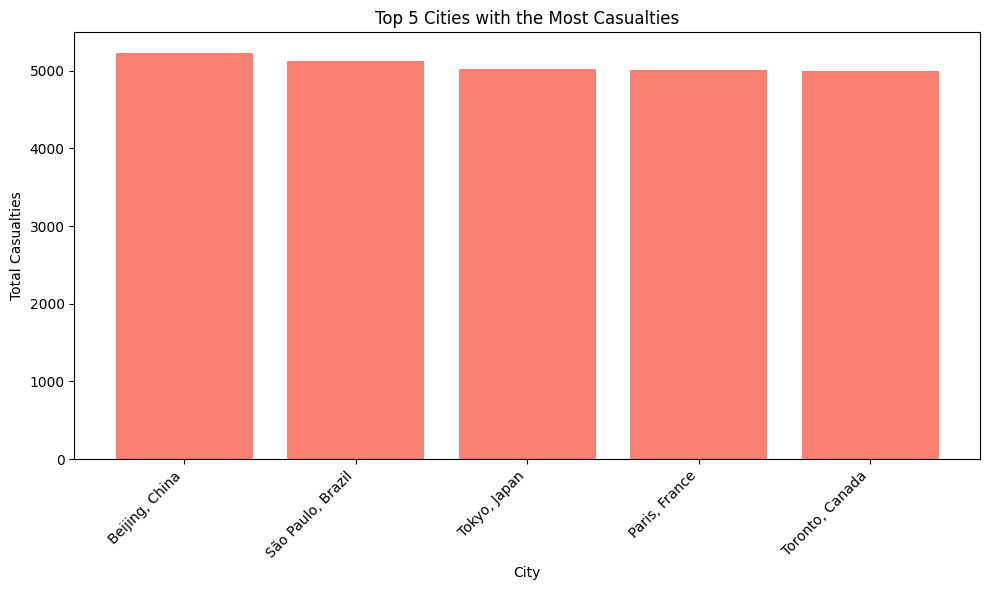

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'Location' and 'Casualties' columns

# Group by location and sum casualties
city_casualties = df.groupby('Location')['Casualties'].sum().reset_index()

# Sort by casualties in descending order and get top 5
top_5_cities = city_casualties.sort_values(by=['Casualties'], ascending=False).head(5)
print(top_5_cities)
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['Location'], top_5_cities['Casualties'], color='salmon')
plt.title('Top 5 Cities with the Most Casualties')
plt.xlabel('City')
plt.ylabel('Total Casualties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Top 5 locations with the highest number of accidents:
 Location
São Paulo, Brazil    1032
New York, USA        1016
Beijing, China       1014
Sydney, Australia    1006
Toronto, Canada      1003
Name: count, dtype: int64


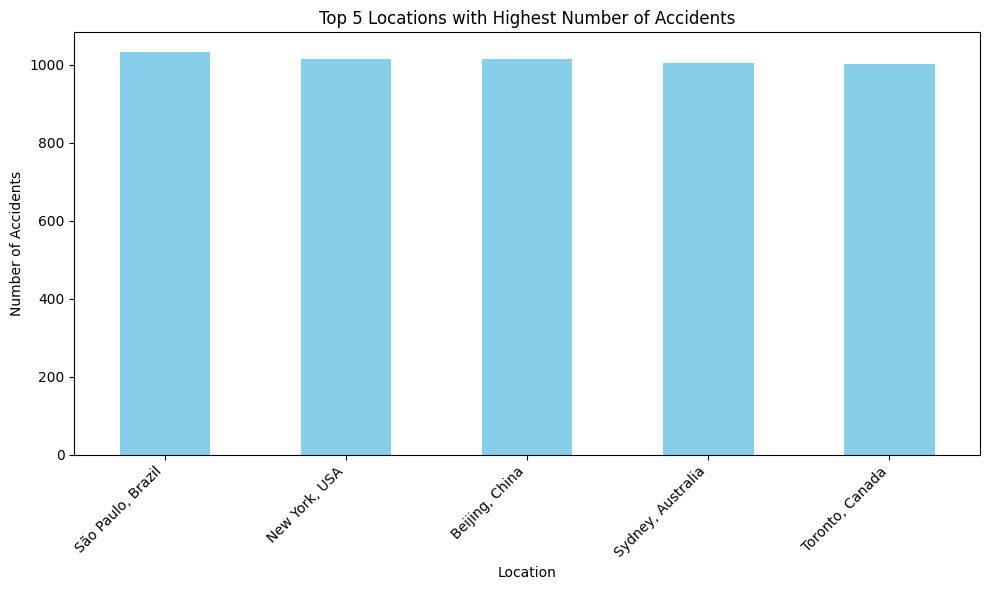

In [7]:
import matplotlib.pyplot as plt
# Top 5 locations with the highest number of accidents
top_locations = df['Location'].value_counts().head(5)
print("Top 5 locations with the highest number of accidents:\n", top_locations)

# Plot for top 5 locations
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Locations with Highest Number of Accidents')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Most common causes of accidents:
 Cause
Drunk Driving         1716
Reckless Driving      1685
Weather Conditions    1657
Speeding              1656
Mechanical Failure    1653
Distracted Driving    1633
Name: count, dtype: int64


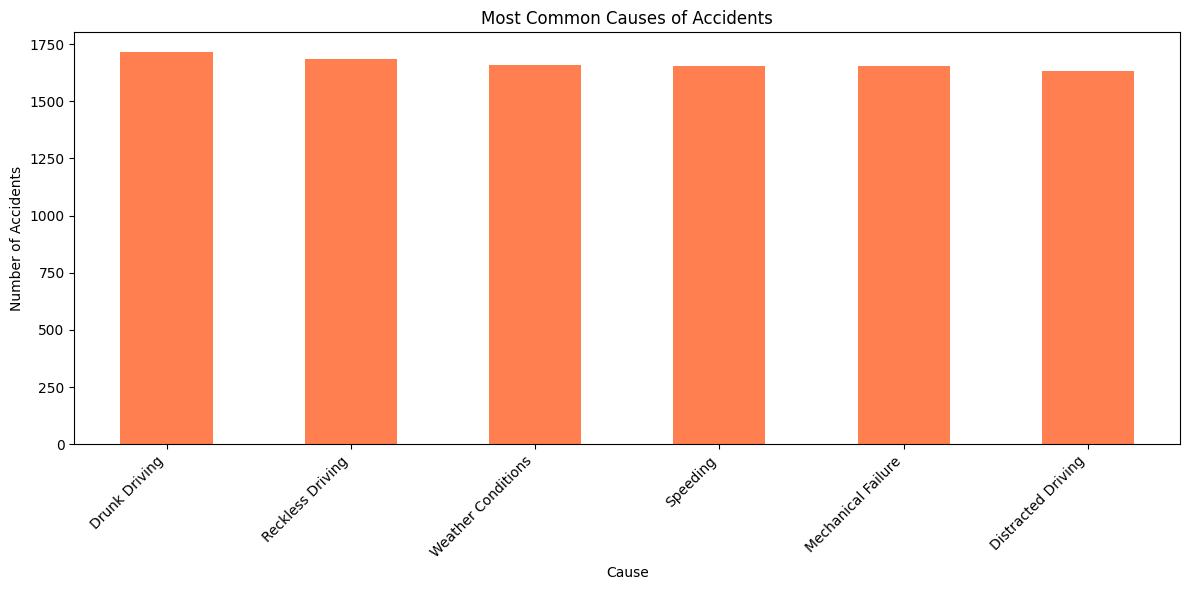

In [8]:
# Most common causes of accidents
common_causes = df['Cause'].value_counts()
print("\nMost common causes of accidents:\n", common_causes)

# Plot for common causes
plt.figure(figsize=(12, 6))
common_causes.plot(kind='bar', color='coral')
plt.title('Most Common Causes of Accidents')
plt.xlabel('Cause')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average casualties per accident: 4.9882


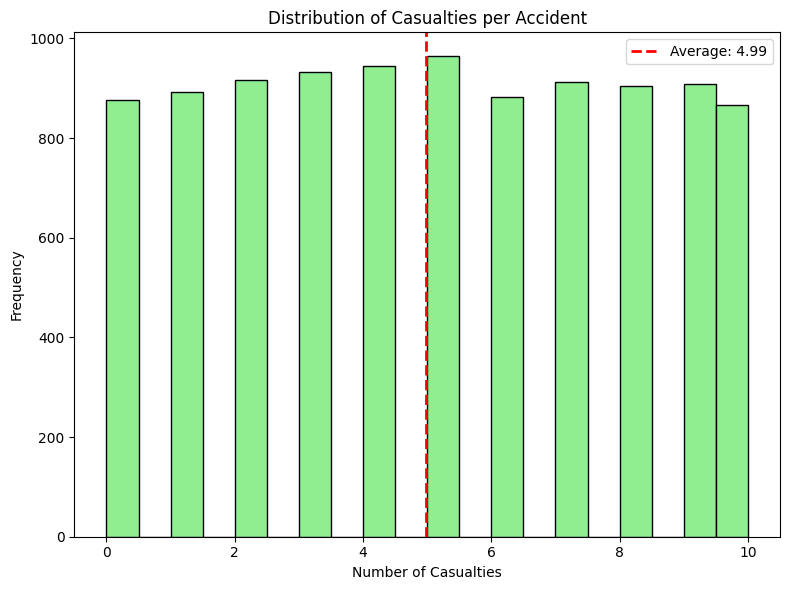

In [9]:
# Average casualties per accident
avg_casualties = df['Casualties'].mean()
print("\nAverage casualties per accident:", avg_casualties)

# Plot for average casualties - Using a histogram to show the distribution of casualties
plt.figure(figsize=(8, 6))
plt.hist(df['Casualties'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Casualties per Accident')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.axvline(avg_casualties, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_casualties:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

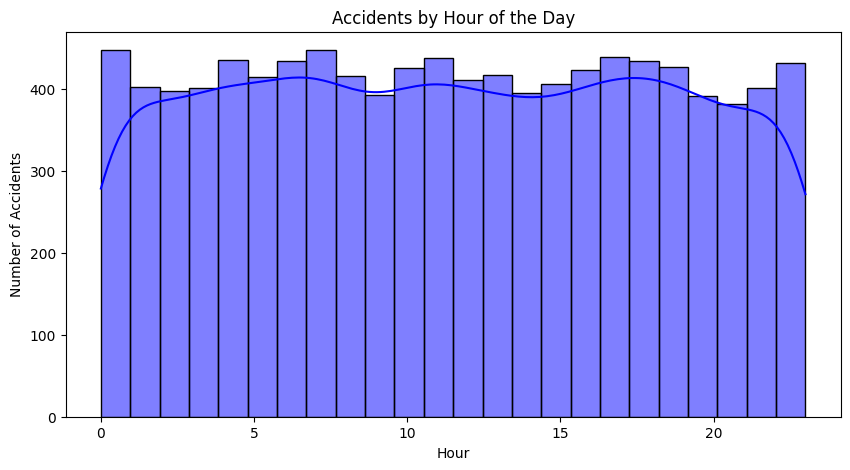

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create hour column
df['Hour'] = df['DateTime'].dt.hour

# Plot accidents by hour
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=True, color="blue")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

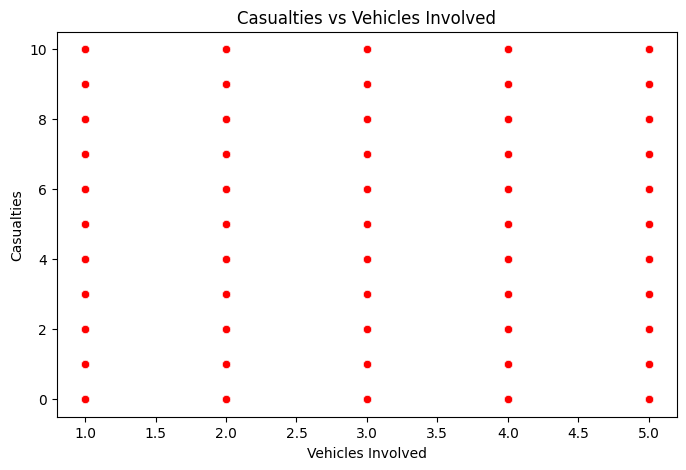

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Vehicles Involved", y="Casualties", data=df, color="red")
plt.title("Casualties vs Vehicles Involved")
plt.xlabel("Vehicles Involved")
plt.ylabel("Casualties")
plt.show()

In [25]:
import folium
import pandas as pd

# Manually corrected latitude and longitude for each city
corrected_locations = {
    "Mumbai, India": (19.0760, 72.8777),
    "São Paulo, Brazil": (-23.5505, -46.6333),
    "Sydney, Australia": (-33.8688, 151.2093),
    "Tokyo, Japan": (35.6895, 139.6917),
    "Beijing, China": (39.9042, 116.4074),
    "Paris, France": (48.8566, 2.3522),
    "London, UK": (51.5074, -0.1278),
    "Toronto, Canada": (43.6510, -79.3470),
    "Berlin, Germany": (52.5200, 13.4050),
    "New York, USA": (40.7128, -74.0060)
}

# Load dataset
df = pd.read_csv("/content/global_traffic_accidents.csv")

# Replace incorrect lat/long with corrected values
for city, coords in corrected_locations.items():
    df.loc[df['Location'] == city, ['Latitude', 'Longitude']] = coords

# Group data by city
city_stats = df.groupby("Location", as_index=False).agg({
    "Vehicles Involved": "sum",
    "Casualties": "sum",
    "Cause": lambda x: x.value_counts().to_dict(),  # Count occurrences of each cause
    "Latitude": "first",
    "Longitude": "first"
})

# Create Folium map centered around a global view
m = folium.Map(location=[20, 0], zoom_start=2)

# Add accident locations with aggregated details
for index, row in city_stats.iterrows():
    # Format cause counts in "Cause: Count" format
    cause_counts = ", ".join([f"{cause}: {count}" for cause, count in row["Cause"].items()])

    # Construct popup text with accident statistics
    popup_text = (
        f"<b>City:</b> {row['Location']}<br>"
        f"<b>Vehicles Involved:</b> {row['Vehicles Involved']}<br>"
        f"<b>Casualties:</b> {row['Casualties']}<br>"
        f"<b>Causes:</b> {cause_counts}"
    )

    # Add marker to the map
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup_text, max_width=400),
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

# Save the map to an HTML file
m.save("accidents_map.html")

# Confirm completion
print("Map saved as 'accidents_map.html'. Open it in a browser to view accident locations.")


Map saved as 'accidents_map.html'. Open it in a browser to view accident locations.


In [26]:
display(m)

Weather Condition
Rain     1681
Clear    1674
Hail     1673
Snow     1667
Fog      1660
Storm    1645
Name: count, dtype: int64


<ipython-input-31-0d1749205525>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette="coolwarm")


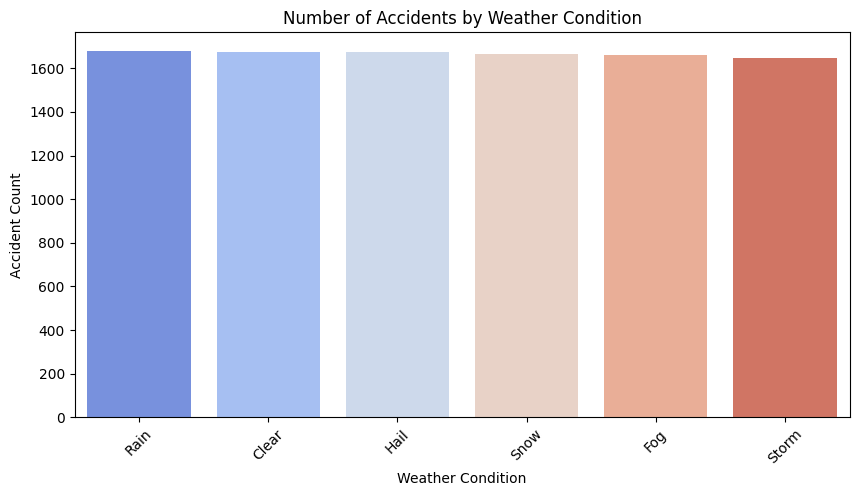

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count accidents by weather condition
weather_accidents = df['Weather Condition'].value_counts()
print(weather_accidents)
# Plot weather conditions vs. accident count
plt.figure(figsize=(10, 5))
sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Number of Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")
plt.show()


Top 5 days with the most accidents:
DayOfWeek
Tuesday     1451
Friday      1449
Saturday    1446
Sunday      1439
Thursday    1439
Name: count, dtype: int64


<ipython-input-41-d6637a5bde56>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DayOfWeek", data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


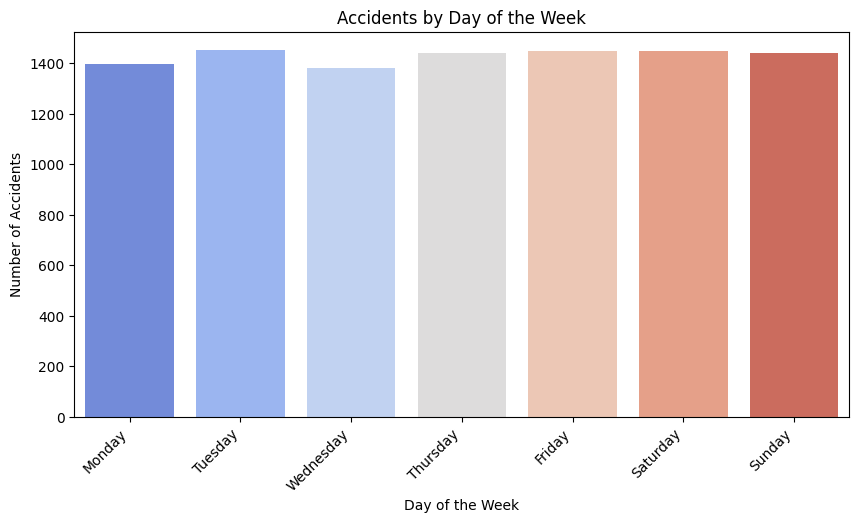

In [41]:
# Assuming you've created the 'DayOfWeek' column:
df['DayOfWeek'] = df['DateTime'].dt.day_name()
# Get the top 5 days of the week
top_5_days = df['DayOfWeek'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 days
filtered_df = df[df['DayOfWeek'].isin(top_5_days)]

# Print the top 5 days with most accidents
print("Top 5 days with the most accidents:")
print(df['DayOfWeek'].value_counts().head(5))

# Plot accidents by Day of the Week
plt.figure(figsize=(10, 5))
sns.countplot(x="DayOfWeek", data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Road Condition
Dry                   1729
Gravel                1702
Wet                   1680
Icy                   1653
Snowy                 1618
Under Construction    1618
Name: count, dtype: int64


<ipython-input-37-d893ebfe4bd5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette="coolwarm")


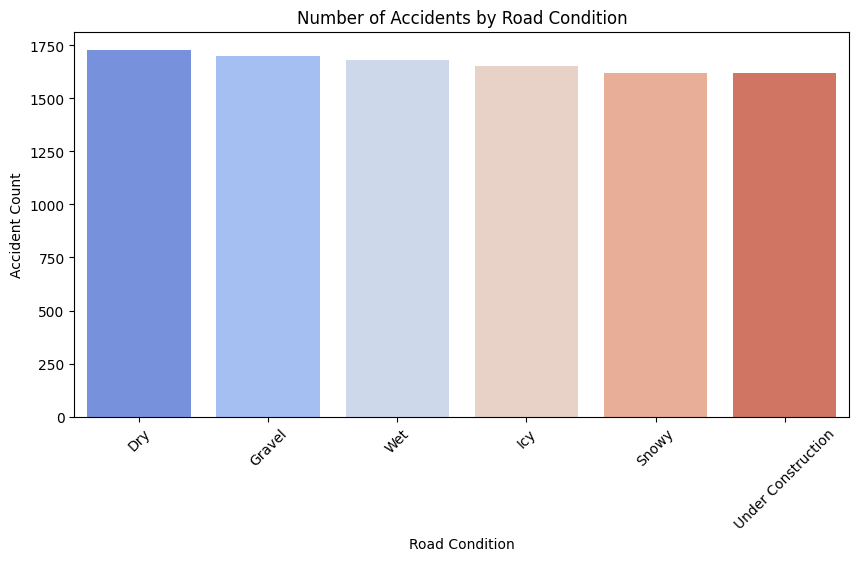

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count accidents by Road condition
road_accidents = df['Road Condition'].value_counts()
print(road_accidents)
# Plot Road conditions vs. accident count
plt.figure(figsize=(10, 5))
sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Number of Accidents by Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Accident Count")
plt.show()

Top 5 months with the most accidents:
Month
May          874
September    869
June         864
December     843
March        840
Name: count, dtype: int64


<ipython-input-40-e37bb4cc7994>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette="coolwarm")


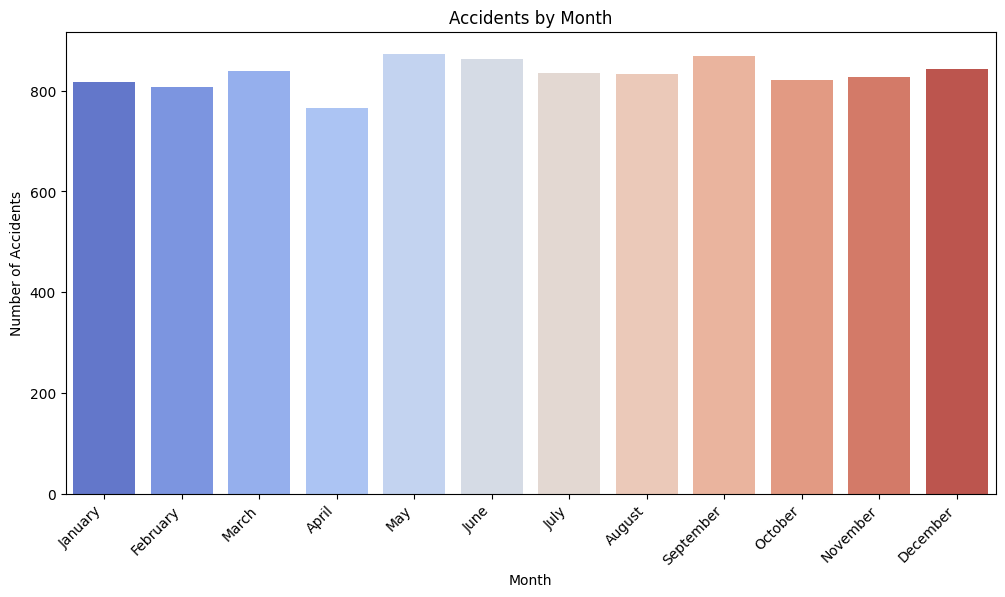

In [40]:
# 1. Accidents by Month:
df['Month'] = df['DateTime'].dt.month_name()  # Extract month name
# Get the top 5 months
top_5_months = df['Month'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 months
filtered_df = df[df['Month'].isin(top_5_months)]

# Print the top 5 months with most accidents
print("Top 5 months with the most accidents:")
print(df['Month'].value_counts().head(5))


plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x="Month", data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette="coolwarm")
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-39-2d5b6f6a57ad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=df, palette="viridis")  # You can change the palette


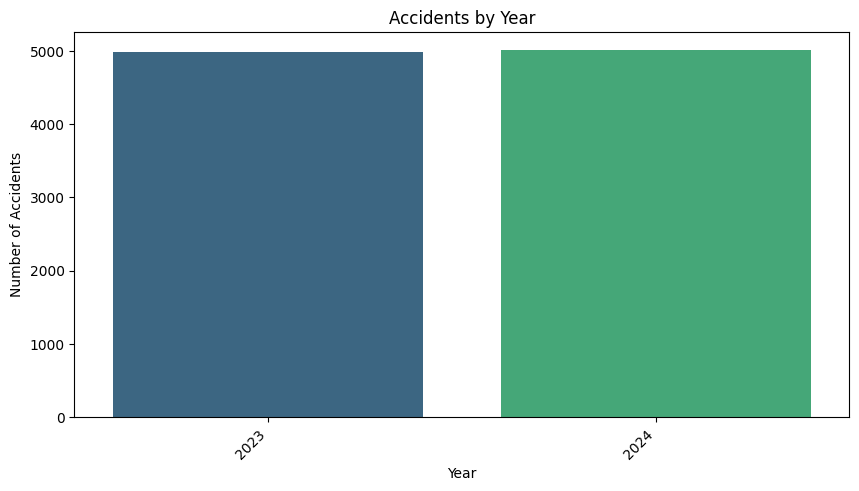

In [39]:
# 2. Accidents by Year:
df['Year'] = df['DateTime'].dt.year  # Extract year

plt.figure(figsize=(10, 5))  # Adjust figure size as needed
sns.countplot(x="Year", data=df, palette="viridis")  # You can change the palette
plt.title("Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')  # Rotate if needed for many years
plt.show()